Install Tensorflow and opencv 

In [1]:
%pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip list

Package                      Version
---------------------------- ---------
absl-py                      2.0.0
asgiref                      3.6.0
asttokens                    2.4.0
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.2.1
certifi                      2022.12.7
charset-normalizer           3.0.1
click                        8.1.3
clyent                       1.2.1
colorama                     0.4.6
comm                         0.1.4
contourpy                    1.1.1
cycler                       0.11.0
debugpy                      1.8.0
decorator                    5.1.1
distlib                      0.3.6
Django                       4.2
et-xmlfile                   1.1.0
executing                    1.2.0
filelock                     3.9.0
Flask                        2.2.2
flatbuffers                  23.1.21
fonttools                    4.38.0
gast                         0.4.0
google-auth                  2.16.0
google-

Import Tensorflow and minimize GPU use

In [3]:
import tensorflow as tf
import tensorflow
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [5]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

Load Data

In [7]:
import cv2
import imghdr
from matplotlib import pyplot as pit

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12208\1998534947.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [8]:
data_dir = 'data'

In [9]:
image_exts = [ 'jpeg','jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

3343.jpeg
d.jpg
d12.jpg
d16.jpg
d18.jpg
d19.jpg
d26.jpg
d29.jpg
d30.jpg
d33.jpg
d34.jpg
d37.jpg
d4.jpg
d43.jpg
d44.jpg
d45.jpg
d50.jpg
d56 (1).jpg
d56.jpg
d58 (1).jpg
d7.jpg
d8.jpg
download (3).jpg
download.jpeg
images (1).jpeg
images (10).jpg
images (19).jpg
images (2).jpeg
images (2).jpg
images (21).jpg
images (22).jpg
images (3).jpeg
images (4).jpeg
images (5).jpeg
images (6).jpeg
images (7).jpg
images (9).jpg
images.jpeg
images.jpg
162023-overflowing-drains (Custom).jpg
download (1).jpeg
download (2).jpeg
download (6).jpg
download (7).jpg
download (8).jpg
download (9).jpg
download.jpeg
images (090).jpeg
images (1).jpeg
images (10).jpeg
images (11).jpeg
images (12).jpeg
images (13).jpeg
images (14).jpeg
images (15).jpeg
images (16).jpeg
images (16).jpg
images (17).jpeg
images (17).jpg
images (18).jpeg
images (18).jpg
images (19).jpeg
images (2).jpeg
images (20).jpeg
images (21).jpeg
images (22).jpeg
images (23).jpeg
images (24).jpeg
images (25).jpeg
images (3).jpeg
images (4).jpeg
i

Remove any unwanted file or image in the data

In [11]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what( image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'. format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('lssue with image {}'.format(image_path))

Process the Data

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 160 files belonging to 4 classes.


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

In [16]:
# 0 = drainage
# 1 = lakes and ponds issues
# 2 = urban flood
batch[1]

array([1, 0, 2, 3, 0, 3, 2, 1, 2, 0, 3, 1, 1, 0, 3, 1, 2, 2, 0, 2, 0, 3,
       3, 1, 2, 1, 3, 0, 3, 2, 1, 3])

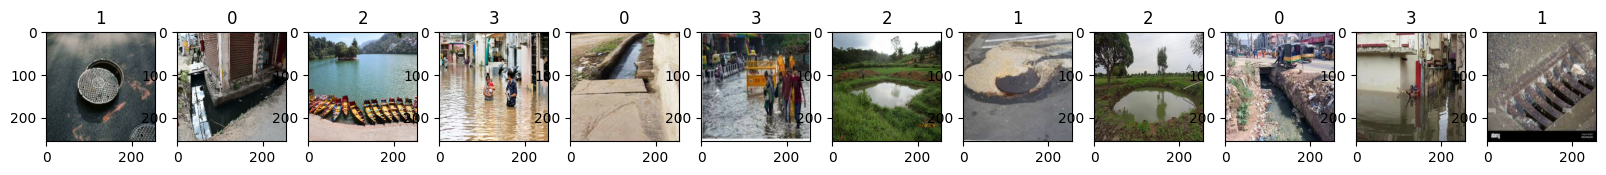

In [17]:
fig, ax = plt.subplots(ncols=12, figsize=(20, 20))
for idx, img in enumerate(batch[0][:12]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [18]:
data = data.map(lambda x, y: (x/255, y))

In [19]:
scaled_iterator = data.as_numpy_iterator()

In [20]:
batch = scaled_iterator.next()

In [21]:
batch[0].max()

1.0

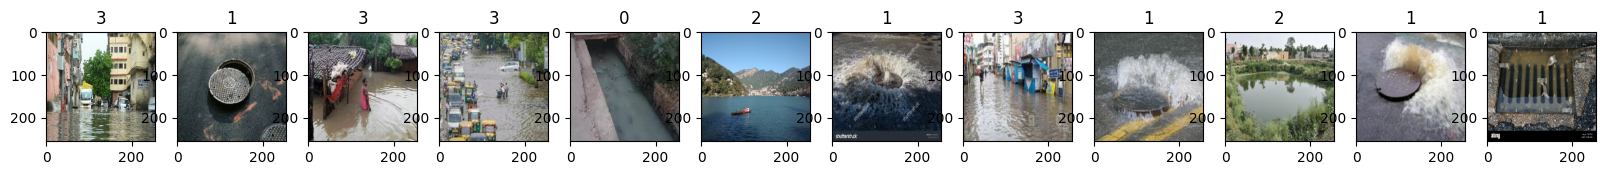

In [22]:
fig, ax = plt.subplots(ncols=12, figsize=(20, 20))
for idx, img in enumerate(batch[0][:12]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

Train data


In [23]:
len(data)

5

In [24]:
train_size = int(len(data)*.5)
val_size = int(len(data)*.3)+1
test_size = int(len(data)*.1)+1

In [25]:
train_size+val_size+test_size

5

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [27]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [28]:
model = Sequential()

In [35]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu')) 
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

ValueError: Input 0 of layer "conv2d_3" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 1)

In [30]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [32]:
logdir = 'logs'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30
2/2 [==============================] - 8s 3s/step - loss: 0.1899 - accuracy: 0.2812 - val_loss: -2.9204 - val_accuracy: 0.2344
Epoch 2/30
2/2 [==============================] - 5s 3s/step - loss: -6.6020 - accuracy: 0.2500 - val_loss: -14.0821 - val_accuracy: 0.2344
Epoch 3/30
2/2 [==============================] - 5s 3s/step - loss: -21.0467 - accuracy: 0.2500 - val_loss: -28.8288 - val_accuracy: 0.3125
Epoch 4/30
2/2 [==============================] - 5s 2s/step - loss: -55.5783 - accuracy: 0.2031 - val_loss: -65.7718 - val_accuracy: 0.2500
Epoch 5/30
2/2 [==============================] - 4s 2s/step - loss: -135.5252 - accuracy: 0.2500 - val_loss: -150.4460 - val_accuracy: 0.2812
Epoch 6/30
2/2 [==============================] - 4s 2s/step - loss: -116.3422 - accuracy: 0.2656 - val_loss: -202.3027 - val_accuracy: 0.2500
Epoch 7/30
2/2 [==============================] - 4s 2s/step - loss: -262.4711 - accuracy: 0.2500 - val_loss: -485.1292 - val_accuracy: 0.1406
Epoch 8/30
